In [1]:
import torch
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
resume_from = os.path.join('./checkpoint', 'inv-gp-0_run1_epoch049.pth')
checkpoint = torch.load(resume_from)
checkpoint['results'].keys()

dict_keys(['train_contrastive_loss', 'train_gradient_penalty', 'train_total_loss', 'test_loss', 'test_acc'])

In [3]:
def load_acc(file):
    resume_from = os.path.join('./checkpoint', file)
    checkpoint = torch.load(resume_from)
    return (checkpoint['results']['train_contrastive_loss'])

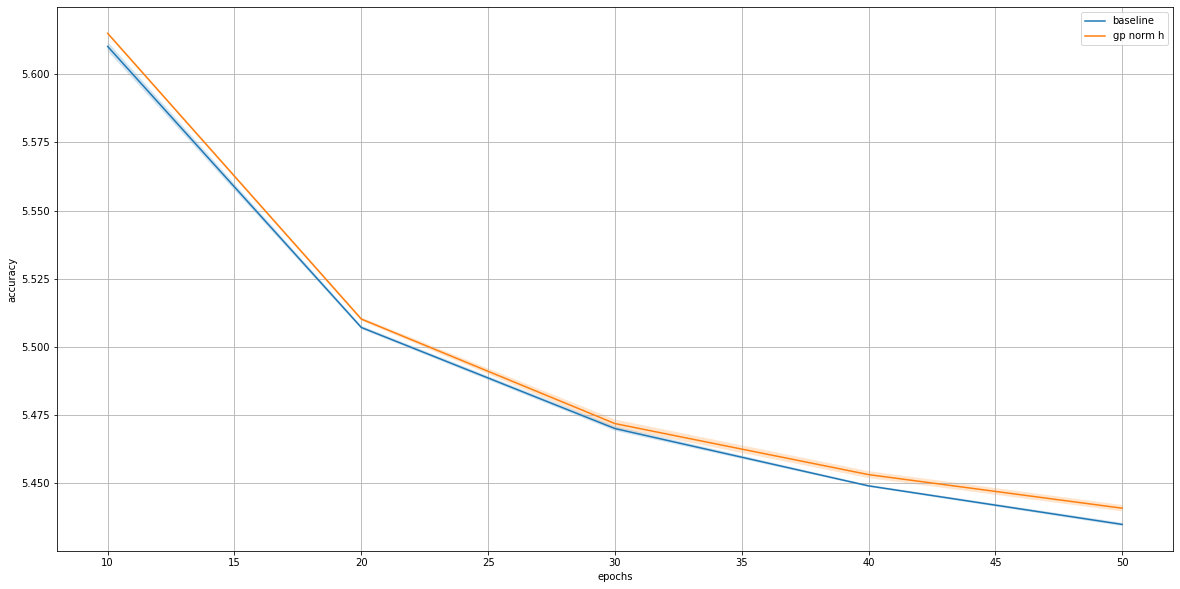

In [4]:
base_acc = []
for file in ['inv-gp-0_run1_epoch049.pth','inv-gp-0_run2_epoch049.pth','inv-gp-0_run3_epoch049.pth','inv-gp-0_run4_epoch049.pth', 'inv-gp-0_run5_epoch049.pth']:
    acc = load_acc(file)
    base_acc.append(acc)
base_acc = np.stack(base_acc)

gp_acc = []
for file in ['inv-gp-1_norm_run1_epoch049.pth','inv-gp-1_norm_run2_epoch049.pth','inv-gp-1_norm_run3_epoch049.pth', 'inv-gp-1_norm_run4_epoch049.pth', 'inv-gp-1_norm_run5_epoch049.pth']:
    acc = load_acc(file)
    gp_acc.append(acc)
gp_acc = np.stack(gp_acc)

gp_mean = gp_acc.mean(axis = 0)
base_mean = base_acc.mean(axis = 0)
gp_std = gp_acc.std(axis = 0)/np.sqrt(gp_acc.shape[0])
base_std = base_acc.std(axis = 0)/np.sqrt(base_acc.shape[0])

epoch = [i*10 for i in range(1,base_mean.shape[0]+1)]

###### plot #####
plt.figure(figsize=(20,10))
plt.plot(epoch, base_mean, label = 'baseline')
plt.fill_between(epoch, base_mean - 1*base_std, base_mean + 1*base_std, alpha = 0.2)

plt.plot(epoch, gp_mean, label = 'gp norm h')
plt.fill_between(epoch, gp_mean - 1*gp_std, gp_mean + 1*gp_std, alpha = 0.2)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

In [5]:
def load_closs(file):
    resume_from = os.path.join('./checkpoint', file)
    checkpoint = torch.load(resume_from)
    return (checkpoint['results']['train_contrastive_loss'])

In [6]:
basecloss = []
for file in ['inv-gp-0_run2_epoch049.pth','inv-gp-0_run3_epoch049.pth','inv-gp-0_run4_epoch049.pth', 'inv-gp-0_run5_epoch049.pth']:
    loss = load_closs(file)
    basecloss.append(loss)
basecloss = np.stack(basecloss)

In [7]:
gp_closs = []
for file in ['inv-gp-1_norm_run2_epoch049.pth','inv-gp-1_norm_run3_epoch049.pth', 'inv-gp-1_norm_run4_epoch049.pth']:
    loss = load_closs(file)
    gp_closs.append(loss)
gp_closs = np.stack(gp_closs)

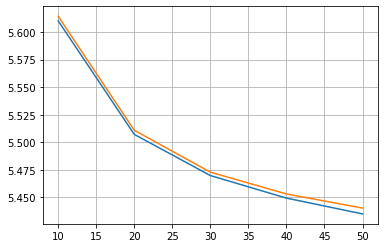

In [8]:
plt.plot(epoch, basecloss.mean(axis = 0))
plt.plot(epoch, gp_closs.mean(axis = 0))
plt.grid(True)

In [9]:
def load_gp(file):
    resume_from = os.path.join('./checkpoint', file)
    checkpoint = torch.load(resume_from)
    return (checkpoint['results']['train_gradient_penalty'])

In [10]:
base_gp = []
for file in ['inv-gp-0_run2_epoch049.pth','inv-gp-0_run3_epoch049.pth','inv-gp-0_run4_epoch049.pth', 'inv-gp-0_run5_epoch049.pth']:
    loss = load_gp(file)
    base_gp.append(loss)
base_gp = np.stack(base_gp)

In [11]:
gp_gp = []
for file in ['inv-gp-1_norm_run2_epoch049.pth','inv-gp-1_norm_run3_epoch049.pth', 'inv-gp-1_norm_run4_epoch049.pth']:
    loss = load_gp(file)
    gp_gp.append(loss)
gp_gp = np.stack(gp_gp)

# plot 100 epochs

In [12]:
load_acc('inv-gp-1_norm_run5_epoch019.pth')

[5.616066957006649, 5.5104672227587015]

In [13]:
load_acc('inv-gp-0_run2_epoch099.pth')

[5.617254753502047,
 5.5047698069591915,
 5.469799611033226,
 5.450259846083972,
 5.437269697383958,
 5.418144561806503,
 5.413506979845008,
 5.410446726545995,
 5.402737009282014,
 5.402294820668746]

In [14]:
load_acc('inv-gp-0_run4_epoch099.pth')

[5.6075261369043465,
 5.5074372972760886,
 5.4666614191872736,
 5.4493419978083395,
 5.435092137784374,
 5.424410688633821,
 5.4171548376278,
 5.411810860341909,
 5.40621846549365,
 5.4062429739504445]

In [15]:
load_acc('inv-gp-1_norm_run3_epoch099.pth')

[5.612979368287689,
 5.51016953526711,
 5.475473024407211,
 5.455015435510752,
 5.441325362847776,
 5.430373308609943,
 5.42049283397441,
 5.416735751288278,
 5.408266159952904,
 5.402069257230175]

In [16]:
load_acc('inv-gp-1_norm_run2_epoch099.pth')

[5.615226443932981,
 5.512021935715968,
 5.46791976325366,
 5.452287386874763,
 5.440196261114004,
 5.428215819962171,
 5.416901953366338,
 5.417284191871176,
 5.413113710831623,
 5.408946499532583]

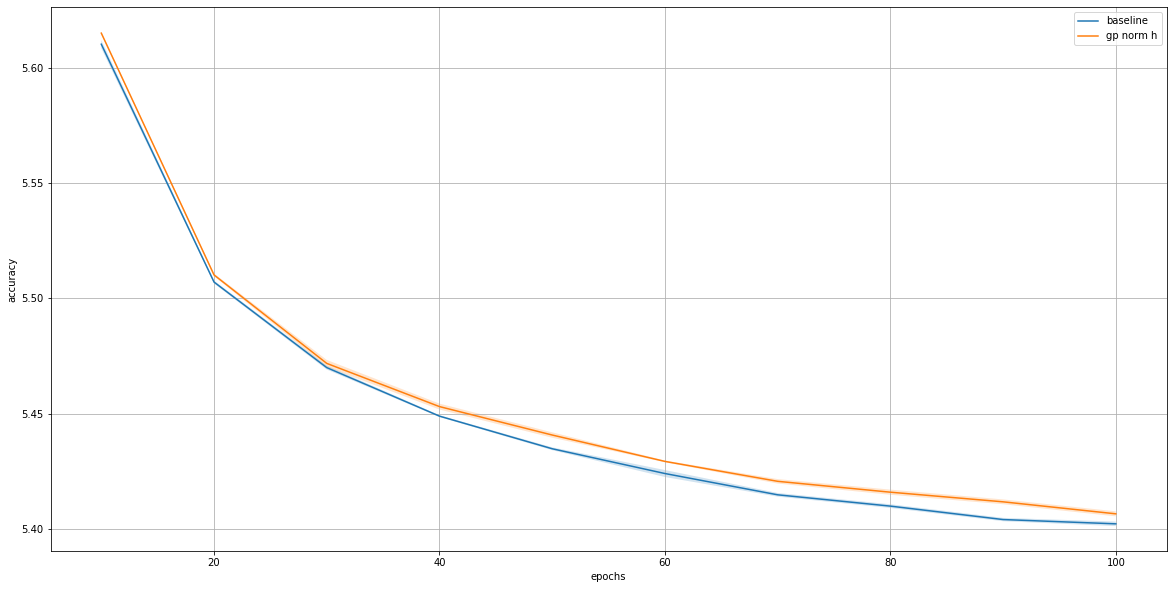

In [17]:
base_acc = []
for file in ['inv-gp-0_run1_epoch099.pth','inv-gp-0_run2_epoch099.pth','inv-gp-0_run3_epoch099.pth','inv-gp-0_run4_epoch099.pth','inv-gp-0_run5_epoch099.pth']:
    acc = load_acc(file)
    base_acc.append(acc)
base_acc = np.stack(base_acc)

gp_acc = []
for file in ['inv-gp-1_norm_run1_epoch099.pth','inv-gp-1_norm_run2_epoch099.pth', 'inv-gp-1_norm_run3_epoch099.pth', 'inv-gp-1_norm_run4_epoch099.pth','inv-gp-1_norm_run5_epoch099.pth']:
    acc = load_acc(file)
    gp_acc.append(acc)
gp_acc = np.stack(gp_acc)

gp_mean = gp_acc.mean(axis = 0)
base_mean = base_acc.mean(axis = 0)
gp_std = gp_acc.std(axis = 0)/np.sqrt(gp_acc.shape[0])
base_std = base_acc.std(axis = 0)/np.sqrt(base_acc.shape[0])

epoch = [i*10 for i in range(1,base_mean.shape[0]+1)]

###### plot #####
plt.figure(figsize=(20,10))
plt.plot(epoch, base_mean, label = 'baseline')
plt.fill_between(epoch, base_mean - 1*base_std, base_mean + 1*base_std, alpha = 0.2)

plt.plot(epoch, gp_mean, label = 'gp norm h')
plt.fill_between(epoch, gp_mean - 1*gp_std, gp_mean + 1*gp_std, alpha = 0.2)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

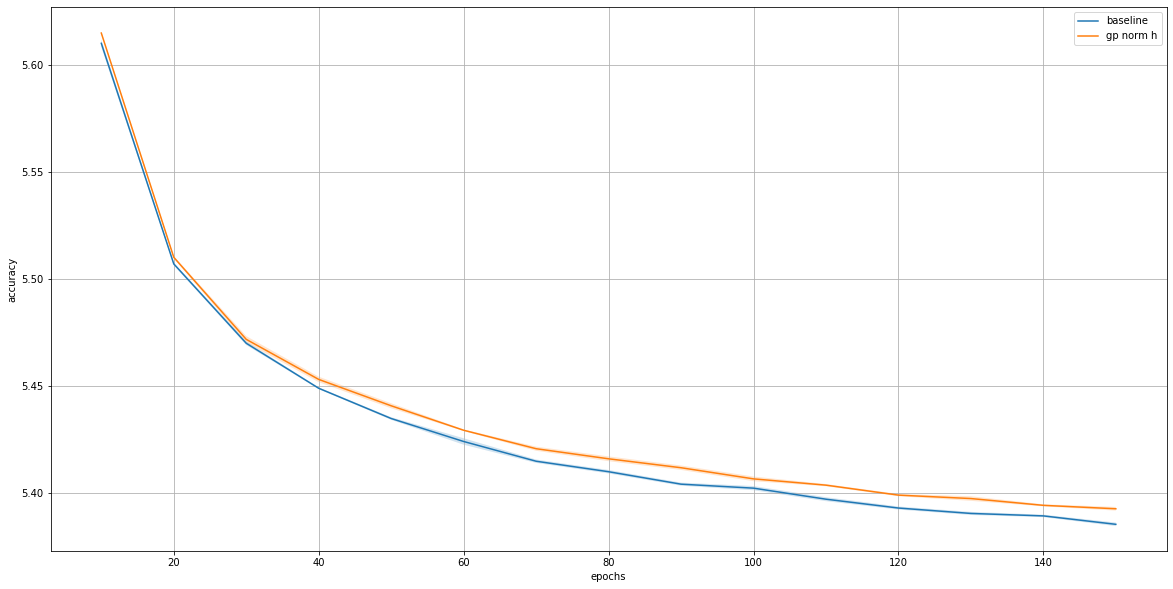

In [18]:
base_acc = []
for file in ['inv-gp-0_run1_epoch149.pth','inv-gp-0_run2_epoch149.pth','inv-gp-0_run3_epoch149.pth','inv-gp-0_run4_epoch149.pth','inv-gp-0_run5_epoch149.pth']:
    acc = load_acc(file)
    base_acc.append(acc)
base_acc = np.stack(base_acc)

gp_acc = []
for file in ['inv-gp-1_norm_run1_epoch149.pth','inv-gp-1_norm_run2_epoch149.pth', 'inv-gp-1_norm_run3_epoch149.pth','inv-gp-1_norm_run4_epoch149.pth','inv-gp-1_norm_run5_epoch149.pth']:
    acc = load_acc(file)
    gp_acc.append(acc)
gp_acc = np.stack(gp_acc)

gp_mean = gp_acc.mean(axis = 0)
base_mean = base_acc.mean(axis = 0)
gp_std = gp_acc.std(axis = 0)/np.sqrt(gp_acc.shape[0])
base_std = base_acc.std(axis = 0)/np.sqrt(base_acc.shape[0])

epoch = [i*10 for i in range(1,base_mean.shape[0]+1)]

###### plot #####
plt.figure(figsize=(20,10))
plt.plot(epoch, base_mean, label = 'baseline')
plt.fill_between(epoch, base_mean - 1*base_std, base_mean + 1*base_std, alpha = 0.2)

plt.plot(epoch, gp_mean, label = 'gp norm h')
plt.fill_between(epoch, gp_mean - 1*gp_std, gp_mean + 1*gp_std, alpha = 0.2)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

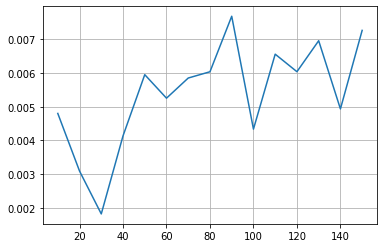

In [19]:
plt.plot(epoch, gp_mean - base_mean, label = 'mean gp - mean baseline')
plt.grid(True)

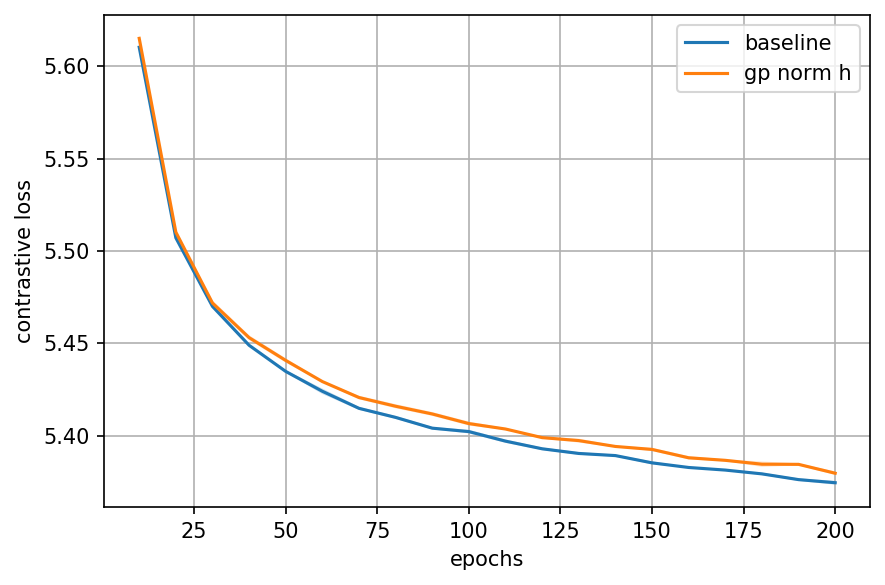

In [36]:
base_acc = []
for file in ['inv-gp-0_run1_epoch199.pth','inv-gp-0_run2_epoch199.pth','inv-gp-0_run3_epoch199.pth','inv-gp-0_run4_epoch199.pth','inv-gp-0_run5_epoch199.pth']:
    acc = load_acc(file)
    base_acc.append(acc)
base_acc = np.stack(base_acc)

gp_acc = []
for file in ['inv-gp-1_norm_run1_epoch199.pth','inv-gp-1_norm_run2_epoch199.pth','inv-gp-1_norm_run3_epoch199.pth', 'inv-gp-1_norm_run4_epoch199.pth','inv-gp-1_norm_run5_epoch199.pth']:
    acc = load_acc(file)
    gp_acc.append(acc)
gp_acc = np.stack(gp_acc)

gp_mean = gp_acc.mean(axis = 0)
base_mean = base_acc.mean(axis = 0)
gp_std = gp_acc.std(axis = 0)/np.sqrt(gp_acc.shape[0])
base_std = base_acc.std(axis = 0)/np.sqrt(base_acc.shape[0])

epoch = [i*10 for i in range(1,base_mean.shape[0]+1)]

###### plot #####
plt.figure( dpi = 150)
plt.plot(epoch, base_mean, label = 'baseline')
plt.fill_between(epoch, base_mean - 1*base_std, base_mean + 1*base_std, alpha = 0.2)

plt.plot(epoch, gp_mean, label = 'gp norm h')
plt.fill_between(epoch, gp_mean - 1*gp_std, gp_mean + 1*gp_std, alpha = 0.2)

plt.xlabel('epochs')
plt.ylabel('contrastive loss')
plt.legend()

# save
destination = os.path.join('./figures', 'closs_plot')
plt.grid(True)
plt.tight_layout()
plt.savefig(destination, dpi = 200)